In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### 1. Loading Dataset

The data used for this project come from: https://www.kaggle.com/competitions/titanic/data

In [80]:
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

**1.1 Train dataset - EDA**

**1.1.1. Understanding the data**

In [4]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This table shows a subset of the Titanic dataset used for a binary classification task. The dataset consists of eleven features and one target variable (Survived). Four features are numerical (Age, Fare, SibSp, Parch), three are categorical (Sex, Pclass, Embarked), and the remaining fields include an identifier (PassengerId) and text-based features (Name, Ticket, Cabin).

In [5]:
dataset_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the initial inspection using the describe() method, no extreme outliers are observed, as the minimum and maximum values of the numerical features fall within reasonable ranges. The Age, Fare, SibSp, and Parch columns are numerical features with different value scales, particularly Fare, which shows a wider range. Therefore, feature scaling may be required to improve the performance and convergence of certain machine learning algorithms. Additionally, slight skewness is observed in some features, especially Fare and SibSp; however, the skewness is not severe enough to indicate significant distribution imbalance.

In [6]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset contains 891 entries. There are missing values in the Age, Cabin, and Embarked columns, which will need to be handled during data preprocessing.

In [7]:
dataset_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**1.1.2 Data Visuzalization**

Label - Surivived

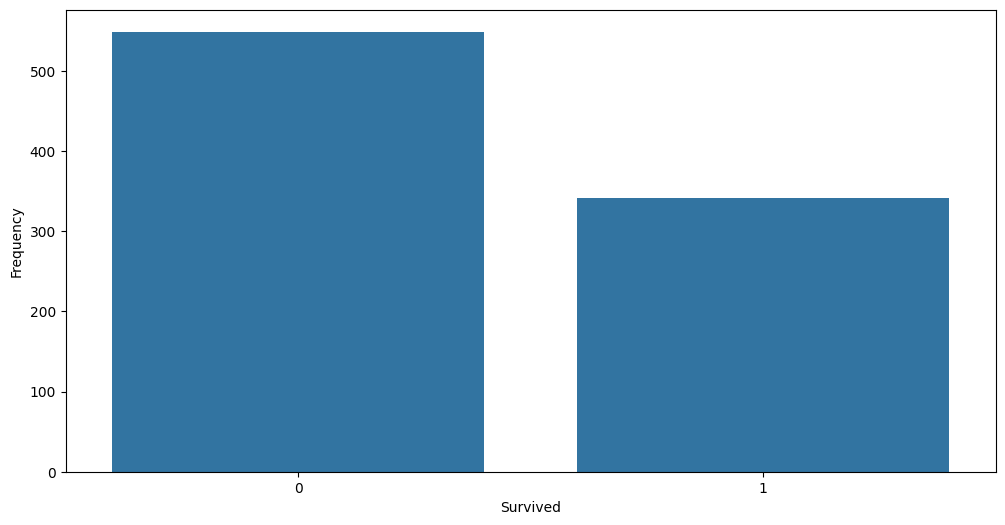

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x=dataset_train["Survived"])
plt.xlabel("Survived")
plt.ylabel("Frequency")
plt.show()

Features

Passenger class

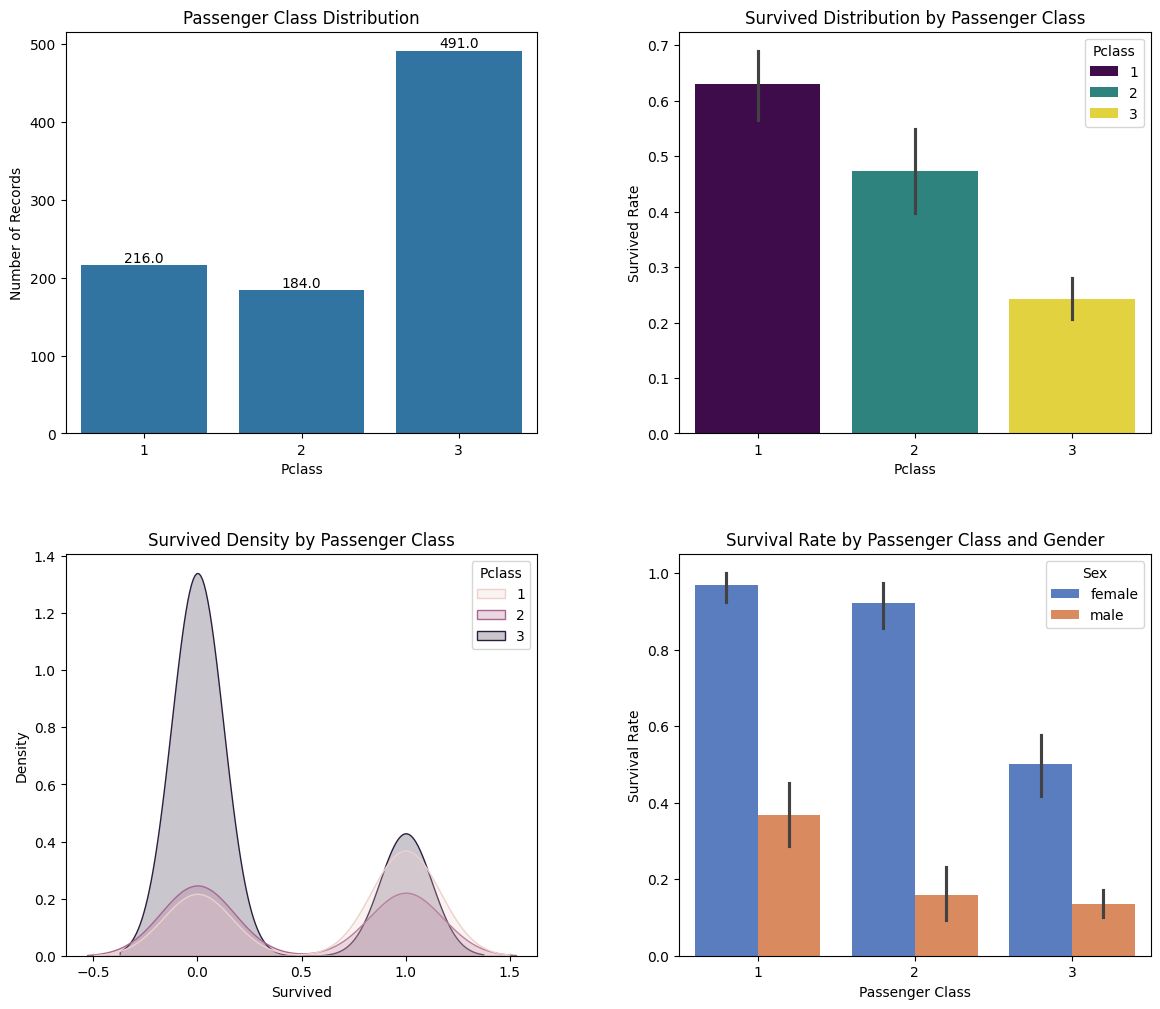

In [81]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))
ax = ax.flatten()

sns.countplot(x='Pclass', data=dataset_train, ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
ax[0].set_title('Passenger Class Distribution')
ax[0].set_ylabel('Number of Records')

sns.barplot(x='Pclass', y='Survived', data=dataset_train, ax=ax[1], hue="Pclass", palette="viridis")
ax[1].set_title('Survived Distribution by Passenger Class')
ax[1].set_ylabel('Survived Rate')

sns.kdeplot(data=dataset_train, x='Survived', hue='Pclass', fill=True, ax=ax[2])
ax[2].set_title('Survived Density by Passenger Class')
ax[2].set_xlabel('Survived')

sns.barplot(
    x="Pclass",
    y="Survived",
    hue="Sex",
    data=dataset_train,
    palette="muted"
)
ax[3].set_title("Survival Rate by Passenger Class and Gender")
ax[3].set_xlabel("Passenger Class")
ax[3].set_ylabel("Survival Rate")


plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

Sex 

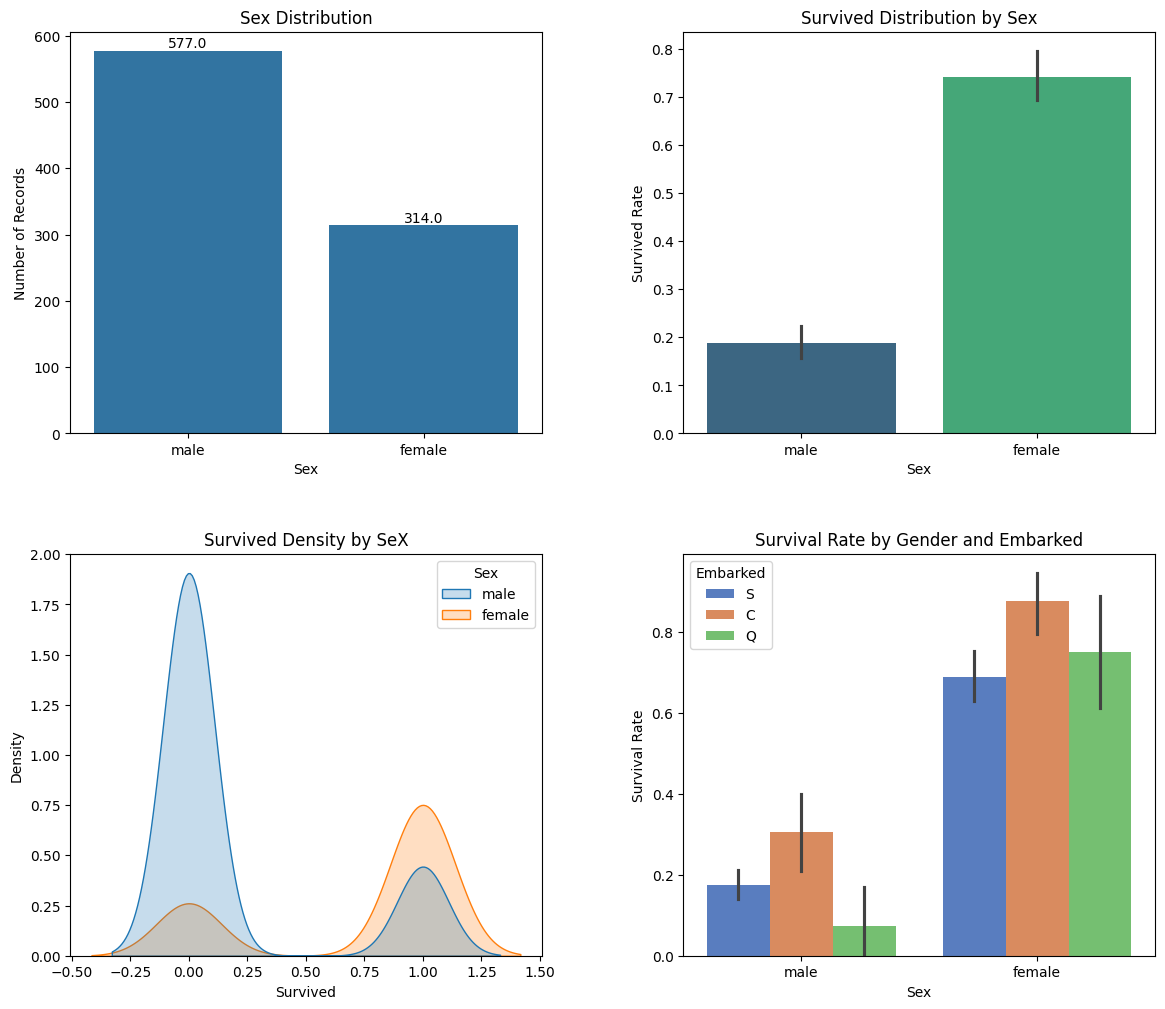

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))
ax = ax.flatten()

sns.countplot(x='Sex', data=dataset_train, ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
ax[0].set_title('Sex Distribution')
ax[0].set_ylabel('Number of Records')

sns.barplot(x='Sex', y='Survived', data=dataset_train, ax=ax[1], hue="Sex", palette="viridis")
ax[1].set_title('Survived Distribution by Sex')
ax[1].set_ylabel('Survived Rate')

sns.kdeplot(data=dataset_train, x='Survived', hue='Sex', fill=True, ax=ax[2])
ax[2].set_title('Survived Density by SeX')
ax[2].set_xlabel('Survived')

sns.barplot(
    x="Sex",
    y="Survived",
    hue="Embarked",
    data=dataset_train,
    palette="muted"
)
ax[3].set_title("Survival Rate by Gender and Embarked")
ax[3].set_xlabel("Sex")
ax[3].set_ylabel("Survival Rate")


plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

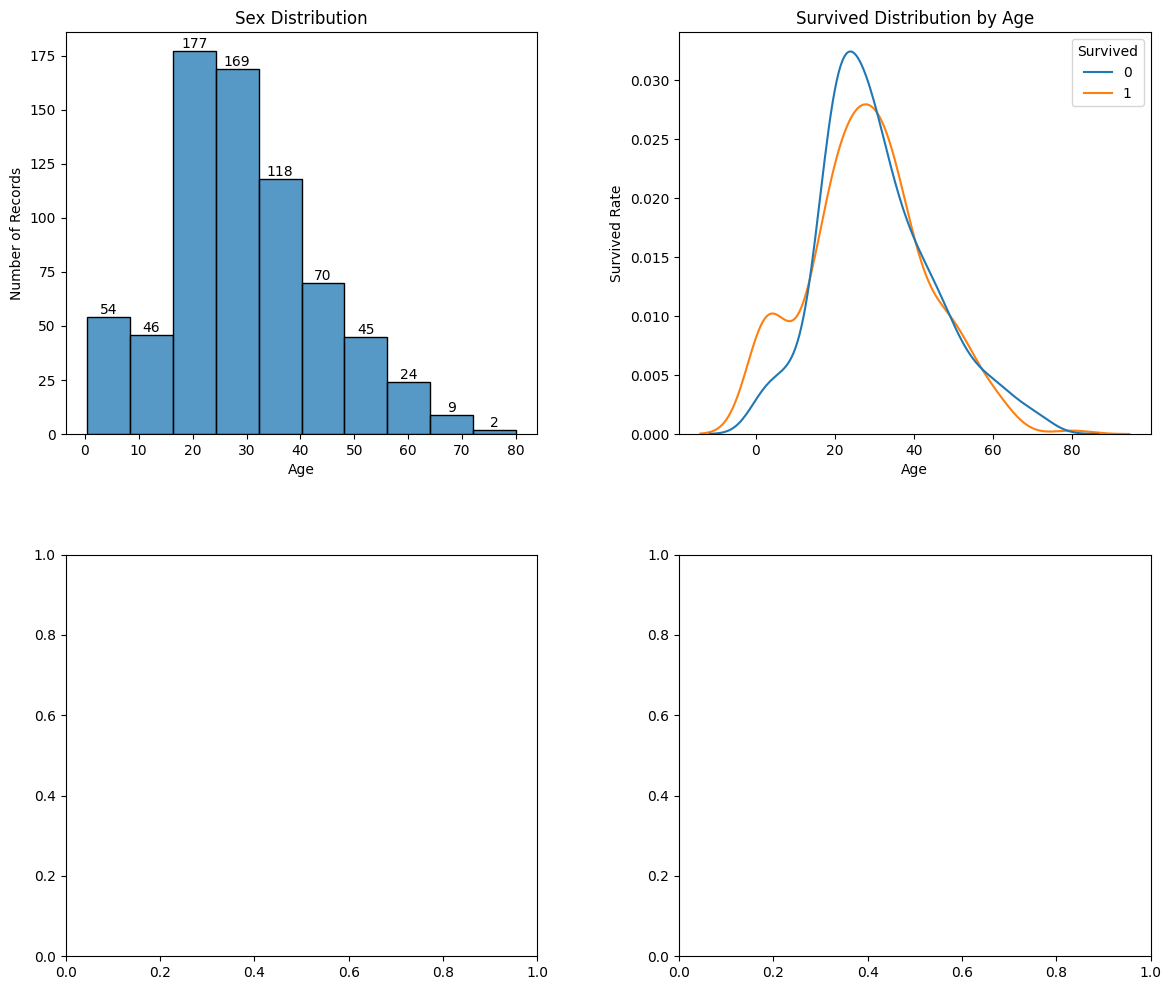

In [97]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))
ax = ax.flatten()

sns.histplot(
    data=dataset_train,
    x='Age',
    bins=10,
    ax=ax[0]
)
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
ax[0].set_title('Sex Distribution')
ax[0].set_ylabel('Number of Records')
sns.kdeplot(
    data=dataset_train,
    x='Age',
    hue='Survived',
    common_norm=False,
    ax=ax[1]
)


ax[1].set_title('Survived Distribution by Age')
ax[1].set_ylabel('Survived Rate')

# sns.kdeplot(data=dataset_train, x='Survived', hue='Sex', fill=True, ax=ax[2])
# ax[2].set_title('Survived Density by SeX')
# ax[2].set_xlabel('Survived')

# sns.barplot(
#     x="Sex",
#     y="Survived",
#     hue="Embarked",
#     data=dataset_train,
#     palette="muted"
# )
# ax[3].set_title("Survival Rate by Gender and Embarked")
# ax[3].set_xlabel("Sex")
# ax[3].set_ylabel("Survival Rate")


plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

1.2 Test data - EDA

In [11]:
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
dataset_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
dataset_test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

2. Data Cleaning

2.1 Check and remove duplicates

In [15]:
dataset_train.duplicated().sum()

np.int64(0)

In [16]:
dataset_test.duplicated().sum()

np.int64(0)

2.2 Detect missing values 

In [17]:
dataset_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
dataset_train['Age'].fillna(dataset_train['Age'].median(), inplace=True)
dataset_train = dataset_train.drop(["Cabin"], axis= 1)
dataset_train['Embarked'].fillna(dataset_train['Embarked'].mode()[0], inplace = True)

In [19]:
dataset_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
dataset_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
dataset_test['Age'].fillna(dataset_test['Age'].median(), inplace=True)
dataset_test['Fare'].fillna(dataset_test['Fare'].median(), inplace=True)
dataset_test = dataset_test.drop(["Cabin"], axis= 1)

In [22]:
dataset_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

2.3 Droping Irrelavant Columns

In [23]:
dataset_train = dataset_train.drop(["Ticket"], axis= 1)
dataset_test = dataset_test.drop(["Ticket"], axis= 1)

In [24]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [25]:
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


Don't need to correcting: validation, handling dates and times, handling outliers or correcting datatypes

3. Feature Engineering

3.1 Encoding Categorical Variables

In [ ]:
dataset_train['Sex'] = dataset_train['Sex'].replace({'male': 1, 'female': 0})
dataset_test['Sex'] = dataset_test['Sex'].replace({'male': 1, 'female': 0})

3.1.1 One-hot encoding

In [27]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
embarked_encoded = ohe.fit_transform(dataset_train[['Embarked']])
embarked_cols = ohe.get_feature_names_out(['Embarked'])
embarked_dataset = pd.DataFrame(embarked_encoded, columns=embarked_cols, index=dataset_train.index)

In [28]:
dataset_train = dataset_train.drop('Embarked', axis=1)
dataset_train = pd.concat([dataset_train, embarked_dataset], axis=1)

In [29]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0


In [30]:
embarked_encoded_test = ohe.fit_transform(dataset_test[['Embarked']])
embarked_cols_test = ohe.get_feature_names_out(['Embarked'])
embarked_dataset = pd.DataFrame(embarked_encoded_test, columns=embarked_cols_test, index=dataset_test.index)

In [31]:
dataset_test = dataset_test.drop('Embarked', axis=1)
dataset_test = pd.concat([dataset_test, embarked_dataset], axis=1)

In [32]:
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0.0,0.0,1.0


3.2.1 Adding new features from Name column

Train dataset

In [33]:
dataset_train['Title'] = dataset_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
dataset_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,1.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,0.0,0.0,1.0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,0.0,0.0,1.0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,0.0,0.0,1.0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,1.0,0.0,0.0,Mr


In [34]:
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
dataset_train['Title'] = dataset_train['Title'].replace(rare_titles, 'Rare')
dataset_train['Title'] = dataset_train['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
dataset_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,1.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,0.0,0.0,1.0,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,0.0,0.0,1.0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,0.0,0.0,1.0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,1.0,0.0,0.0,Mr


In [35]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
dataset_train['Title'] = dataset_train['Title'].map(title_mapping)
dataset_train['Title'] = dataset_train['Title'].fillna(0)
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,1.0,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0,1


Test dataset

In [36]:
dataset_test['Title'] = dataset_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
dataset_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0.0,1.0,0.0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0.0,0.0,1.0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0.0,1.0,0.0,Mr
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0.0,0.0,1.0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0.0,0.0,1.0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,8.0500,0.0,0.0,1.0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,1.0,0.0,0.0,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,0.0,0.0,1.0,Mr
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,8.0500,0.0,0.0,1.0,Mr


In [37]:
dataset_test['Title'] = dataset_test['Title'].replace(rare_titles, 'Rare')
dataset_test['Title'] = dataset_test['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
dataset_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0.0,1.0,0.0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0.0,0.0,1.0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0.0,1.0,0.0,Mr
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0.0,0.0,1.0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0.0,0.0,1.0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,8.0500,0.0,0.0,1.0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,1.0,0.0,0.0,Rare
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,0.0,0.0,1.0,Mr
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,8.0500,0.0,0.0,1.0,Mr


In [38]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
dataset_test['Title'] = dataset_test['Title'].map(title_mapping)
dataset_test['Title'] = dataset_test['Title'].fillna(0)
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0.0,1.0,0.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0.0,0.0,1.0,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0.0,1.0,0.0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0.0,0.0,1.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0.0,0.0,1.0,3


In [39]:
pass_col = dataset_test["PassengerId"]

In [40]:
dataset_train = dataset_train.drop(["Name", "PassengerId"], axis=1)
dataset_test = dataset_test.drop(["Name", "PassengerId"],  axis=1)

In [41]:
dataset_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0,1
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0,3
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0,1
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0,1
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0.0,0.0,1.0,1
414,1,0,39.0,0,0,108.9000,1.0,0.0,0.0,5
415,3,1,38.5,0,0,7.2500,0.0,0.0,1.0,1
416,3,1,27.0,0,0,8.0500,0.0,0.0,1.0,1


3.2.2 Adding new features from Parch and SibSp columns

In [42]:
dataset_train["FamilySize"] = dataset_train["SibSp"] + dataset_train["Parch"] + 1
dataset_train["IsAlone"] = (dataset_train["FamilySize"] == 1).astype(int)

In [43]:
dataset_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,1,2,0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,3,2,0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,2,1,1
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,3,2,0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0,0.0,1.0,5,1,1
887,1,1,0,19.0,0,0,30.0000,0.0,0.0,1.0,2,1,1
888,0,3,0,28.0,1,2,23.4500,0.0,0.0,1.0,2,4,0
889,1,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,1,1,1


In [44]:
dataset_test["FamilySize"] = dataset_test["SibSp"] + dataset_test["Parch"] + 1
dataset_test["IsAlone"] = (dataset_test["FamilySize"] == 1).astype(int)

In [45]:
dataset_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0,1,1,1
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0,3,2,0
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0,1,1,1
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0,1,1,1
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0.0,0.0,1.0,1,1,1
414,1,0,39.0,0,0,108.9000,1.0,0.0,0.0,5,1,1
415,3,1,38.5,0,0,7.2500,0.0,0.0,1.0,1,1,1
416,3,1,27.0,0,0,8.0500,0.0,0.0,1.0,1,1,1


3.3 Feature Transformation

Age - bins

In [46]:
dataset_train['Age'] = dataset_train['Age'].astype(int)
dataset_test['Age'] = dataset_test['Age'].astype(int)

In [47]:
dataset_train.loc[ dataset_train['Age'] <= 16, 'Age'] = 0
dataset_train.loc[(dataset_train['Age'] > 16) & (dataset_train['Age'] <= 32), 'Age'] = 1
dataset_train.loc[(dataset_train['Age'] > 32) & (dataset_train['Age'] <= 48), 'Age'] = 2
dataset_train.loc[(dataset_train['Age'] > 48) & (dataset_train['Age'] <= 64), 'Age'] = 3
dataset_train.loc[ dataset_train['Age'] > 64, 'Age'] = 5

In [48]:
dataset_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
0,0,3,1,1,1,0,7.2500,0.0,0.0,1.0,1,2,0
1,1,1,0,2,1,0,71.2833,1.0,0.0,0.0,3,2,0
2,1,3,0,1,0,0,7.9250,0.0,0.0,1.0,2,1,1
3,1,1,0,2,1,0,53.1000,0.0,0.0,1.0,3,2,0
4,0,3,1,2,0,0,8.0500,0.0,0.0,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,13.0000,0.0,0.0,1.0,5,1,1
887,1,1,0,1,0,0,30.0000,0.0,0.0,1.0,2,1,1
888,0,3,0,1,1,2,23.4500,0.0,0.0,1.0,2,4,0
889,1,1,1,1,0,0,30.0000,1.0,0.0,0.0,1,1,1


In [49]:
dataset_test.loc[ dataset_test['Age'] <= 16, 'Age'] = 0
dataset_test.loc[(dataset_test['Age'] > 16) & (dataset_test['Age'] <= 32), 'Age'] = 1
dataset_test.loc[(dataset_test['Age'] > 32) & (dataset_test['Age'] <= 48), 'Age'] = 2
dataset_test.loc[(dataset_test['Age'] > 48) & (dataset_test['Age'] <= 64), 'Age'] = 3
dataset_test.loc[ dataset_test['Age'] > 64, 'Age'] = 5

In [50]:
dataset_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
0,3,1,2,0,0,7.8292,0.0,1.0,0.0,1,1,1
1,3,0,2,1,0,7.0000,0.0,0.0,1.0,3,2,0
2,2,1,3,0,0,9.6875,0.0,1.0,0.0,1,1,1
3,3,1,1,0,0,8.6625,0.0,0.0,1.0,1,1,1
4,3,0,1,1,1,12.2875,0.0,0.0,1.0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,1,0,0,8.0500,0.0,0.0,1.0,1,1,1
414,1,0,2,0,0,108.9000,1.0,0.0,0.0,5,1,1
415,3,1,2,0,0,7.2500,0.0,0.0,1.0,1,1,1
416,3,1,1,0,0,8.0500,0.0,0.0,1.0,1,1,1


Fare - scaling

In [51]:
scaler = StandardScaler()

In [52]:
dataset_train["Fare_scaled"] = scaler.fit_transform(dataset_train[['Fare']])
dataset_train = dataset_train.drop(["Fare"], axis= 1)
dataset_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone,Fare_scaled
0,0,3,1,1,1,0,0.0,0.0,1.0,1,2,0,-0.502445
1,1,1,0,2,1,0,1.0,0.0,0.0,3,2,0,0.786845
2,1,3,0,1,0,0,0.0,0.0,1.0,2,1,1,-0.488854
3,1,1,0,2,1,0,0.0,0.0,1.0,3,2,0,0.420730
4,0,3,1,2,0,0,0.0,0.0,1.0,1,1,1,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,0.0,0.0,1.0,5,1,1,-0.386671
887,1,1,0,1,0,0,0.0,0.0,1.0,2,1,1,-0.044381
888,0,3,0,1,1,2,0.0,0.0,1.0,2,4,0,-0.176263
889,1,1,1,1,0,0,1.0,0.0,0.0,1,1,1,-0.044381


In [53]:
dataset_test["Fare_scaled"] = scaler.fit_transform(dataset_test[['Fare']])
dataset_test = dataset_test.drop(["Fare"], axis= 1)
dataset_test

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone,Fare_scaled
0,3,1,2,0,0,0.0,1.0,0.0,1,1,1,-0.497413
1,3,0,2,1,0,0.0,0.0,1.0,3,2,0,-0.512278
2,2,1,3,0,0,0.0,1.0,0.0,1,1,1,-0.464100
3,3,1,1,0,0,0.0,0.0,1.0,1,1,1,-0.482475
4,3,0,1,1,1,0.0,0.0,1.0,3,3,0,-0.417492
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,1,0,0,0.0,0.0,1.0,1,1,1,-0.493455
414,1,0,2,0,0,1.0,0.0,0.0,5,1,1,1.314435
415,3,1,2,0,0,0.0,0.0,1.0,1,1,1,-0.507796
416,3,1,1,0,0,0.0,0.0,1.0,1,1,1,-0.493455


4. Train / Test Split

In [54]:
X = dataset_train.drop('Survived', axis=1)  
y = dataset_train['Survived']               

In [55]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [56]:
len(X_train), len(X_val), len(y_train), len(y_val)

(712, 179, 712, 179)

5. Exploratory Data Analysis with Statistics

In [57]:
dataset_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone,Fare_scaled
0,0,3,1,1,1,0,0.0,0.0,1.0,1,2,0,-0.502445
1,1,1,0,2,1,0,1.0,0.0,0.0,3,2,0,0.786845
2,1,3,0,1,0,0,0.0,0.0,1.0,2,1,1,-0.488854
3,1,1,0,2,1,0,0.0,0.0,1.0,3,2,0,0.420730
4,0,3,1,2,0,0,0.0,0.0,1.0,1,1,1,-0.486337


6. Model selection

6.1 Logistic Regression

In [58]:
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)
y_pred_lg = model_lg.predict(X_val)


acc_log = round(model_lg.score(X_train, y_train) * 100, 2)
acc_log

81.74

In [59]:
print(classification_report(y_val, y_pred_lg))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



6.2 K-Nearest Neighbors (KNN)!

In [60]:
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_val)

acc_knn = round(model_knn.score(X_train, y_train) * 100, 2)
acc_knn

84.83

In [61]:
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       110
           1       0.84      0.54      0.65        69

    accuracy                           0.78       179
   macro avg       0.80      0.74      0.75       179
weighted avg       0.79      0.78      0.77       179



6.3 Naive Bayes

In [62]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_val)


acc_nb = round(model_nb.score(X_train, y_train) * 100, 2)
acc_nb

80.2

In [63]:
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       110
           1       0.71      0.70      0.70        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



6.4 Decision Tree

In [64]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_val)


acc_dt = round(model_dt.score(X_train, y_train) * 100, 2)
acc_dt

94.66

In [65]:
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       110
           1       0.71      0.70      0.70        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



6.5 TensorFlow Neural Network Model

In [66]:
tf.random.set_seed(42)

model_nn_tf = tf.keras.Sequential([ 
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_nn_tf.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

history = model_nn_tf.fit(X_train, y_train, epochs = 50)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6121 - loss: 6.2519
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6121 - loss: 6.2519 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6121 - loss: 6.2519
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6121 - loss: 6.2519 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6121 - loss: 6.2519
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6121 - loss: 6.2519
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6121 - loss: 6.2519
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6121 - loss: 6.2519 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6121 - loss: 6.2519 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6121 - loss: 6.2519
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6121 - loss: 6.2519 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6121

In [67]:
model_nn_tf.evaluate(X_val, y_val)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6129 - loss: 6.2388  


[6.213120460510254, 0.6145251393318176]

In [68]:
y_test_pred = model_nn_tf.predict(dataset_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


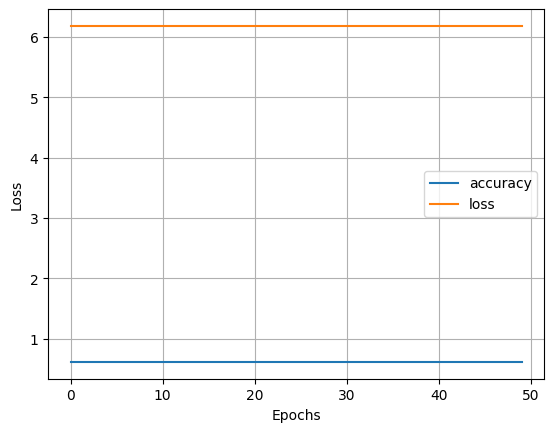

In [69]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid(True)

In [70]:
acc_tf = history.history.get("accuracy", [])
acc_tf = acc_tf[-1] * 100

7. Model Evaluation

In [71]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', "TensorFlow"],
    'Score': [ acc_knn, acc_log, acc_nb, acc_dt, acc_tf]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,94.660000
0,KNN,84.830000
1,Logistic Regression,81.740000
2,Naive Bayes,80.200000
4,TensorFlow,61.657304


In [72]:
solution = model_knn.predict(dataset_test)

In [73]:
solution_2 = model_dt.predict(dataset_test)

In [74]:
predictions = (y_test_pred > 0.5).astype(int).flatten()

In [75]:
submission_df = pd.DataFrame({
    "PassengerId": pass_col,
    "Survived": predictions 
})
# submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head(10)  

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0
